In [18]:
import numpy as np
import pandas as pd
import seaborn as sns # Make sure this cell is run before the next one
import matplotlib.pyplot as plt


In [20]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='Density'>

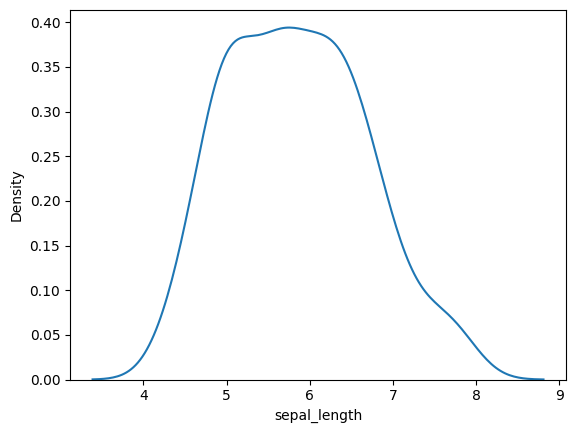

In [21]:
sns.kdeplot(df['sepal_length'])

In [22]:
import statsmodels.api as sm

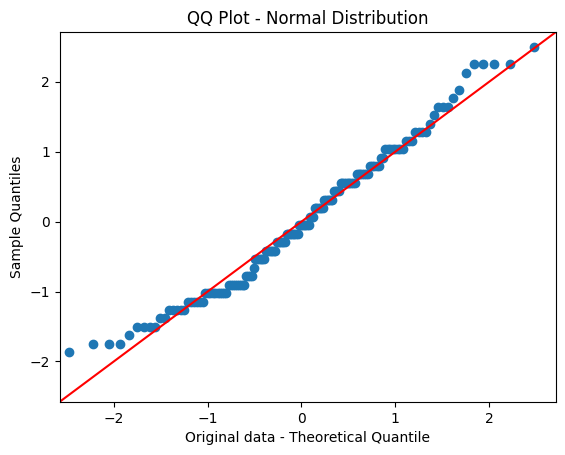

In [23]:
fig = sm.qqplot(df['sepal_length'],line='45',fit=True)
plt.title('QQ Plot - Normal Distribution')
plt.xlabel("Original data - Theoretical Quantile")
plt.ylabel("Sample Quantiles")
plt.show()

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

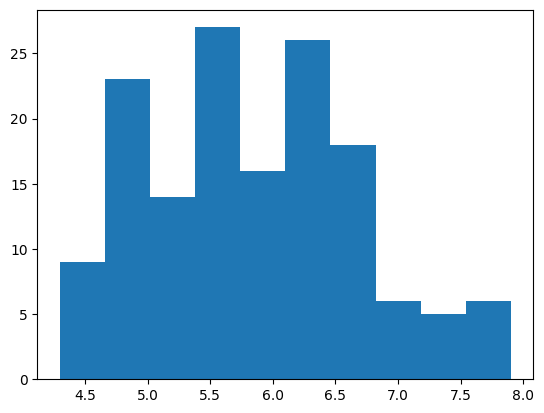

In [24]:
plt.hist(df['sepal_length'])

In [25]:
dataset = pd.read_csv("titanic_train.csv")

In [26]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
dataset = dataset[['Survived','Age','Fare']]

In [28]:
#splitting the data into dependent and independent varibale

In [29]:
x = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [30]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [31]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [32]:
len(y)

891

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

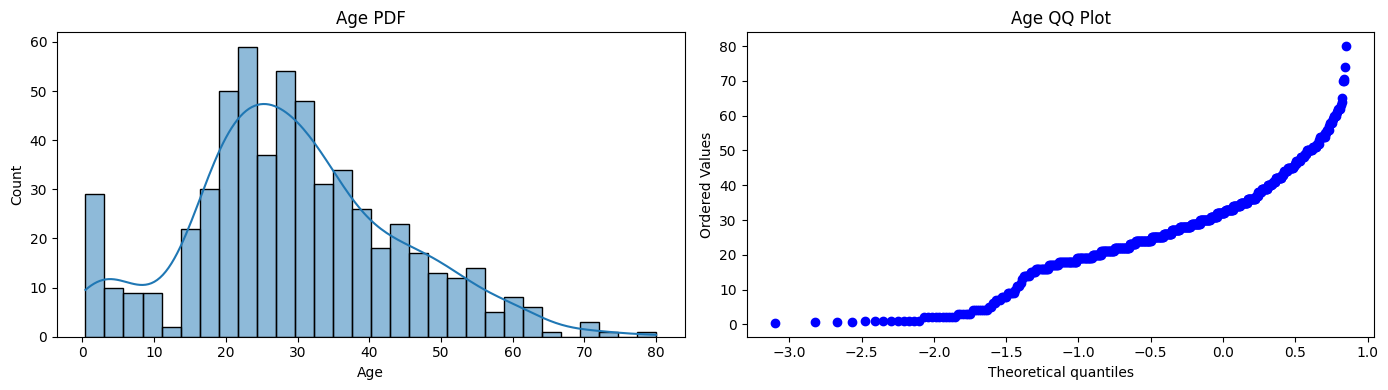

In [34]:
import scipy.stats as stats

# Set up the figure
plt.figure(figsize=(14, 4))

# Plotting Age PDF (Probability Density Function)
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True, bins=30)  # Replaced sns.distplot with sns.histplot
plt.title("Age PDF")

# Plotting Age QQ Plot
plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)  # QQ plot for normality check
plt.title("Age QQ Plot")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


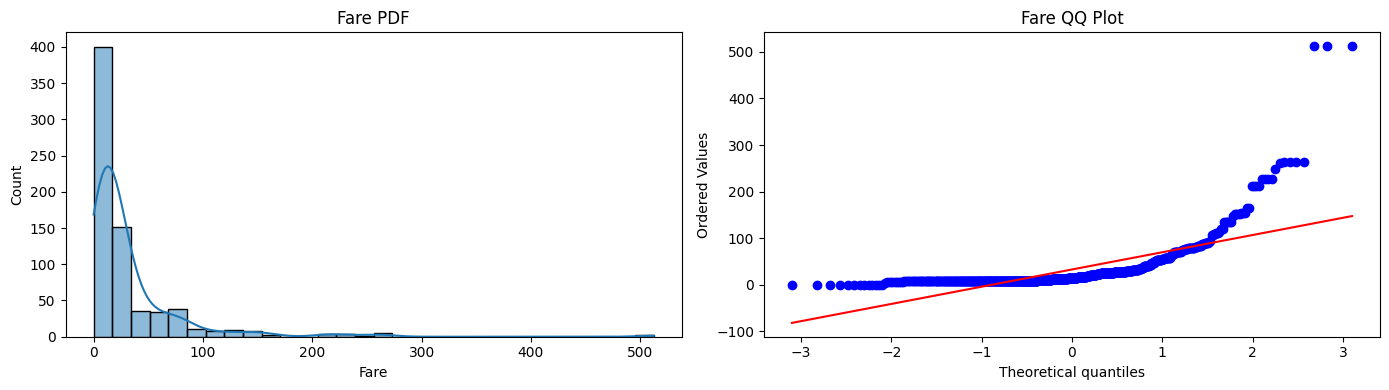

In [35]:
# Set up the figure
plt.figure(figsize=(14, 4))

# Plotting Age PDF (Probability Density Function)
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True, bins=30)  # Replaced sns.distplot with sns.histplot
plt.title("Fare PDF")

# Plotting Age QQ Plot
plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)  # QQ plot for normality check
plt.title("Fare QQ Plot")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [36]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
x_train_transform = trf.transform(x_train)

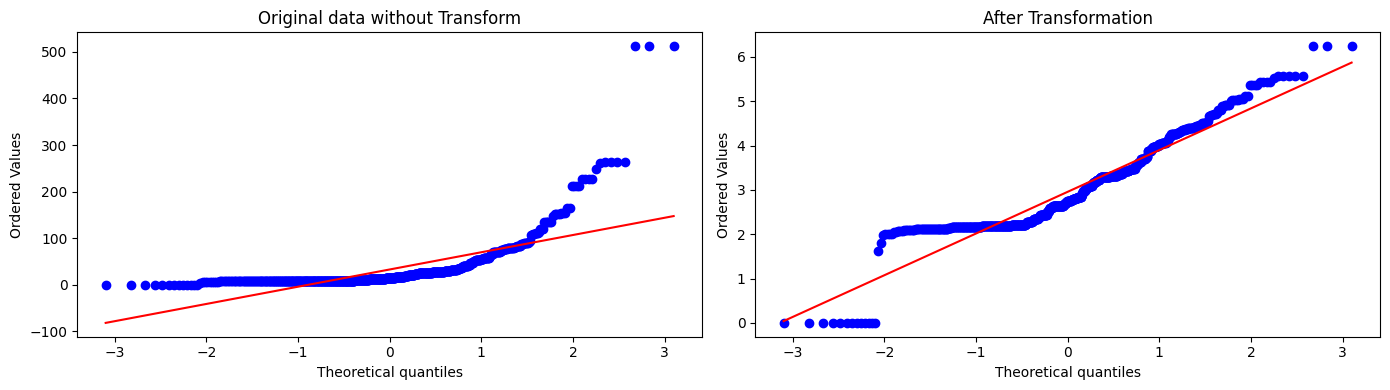

In [37]:
# Set up the figure
plt.figure(figsize=(14, 4))

# Plotting Age PDF (Probability Density Function)
plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)  # QQ plot for normality check
plt.title("Original data without Transform")

# Plotting Age QQ Plot
plt.subplot(122)
stats.probplot(x_train_transform['Fare'], dist='norm', plot=plt)  # QQ plot for normality check
plt.title("After Transformation")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [38]:
dataset = pd.read_csv("titanic_train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pandas Profiling

In [39]:
!pip install ydata-profiling

In [40]:
from pandas_profiling import ProfileReport

In [41]:
prof = ProfileReport(dataset)
prof.to_file(output_file='My_Analysis_with_Titanic_Dataset.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7909383d18f0, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#LUX,
#detailed pro
#detailed package
# pandas profiling